In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = yf.download('AAPL', start='2018-01-01', end='2023-12-31')
data.head()

/tmp/ipython-input-799129068.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2018-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.426830,40.436220,39.722775,39.933994,102223600
2018-01-03,40.419788,40.964259,40.356426,40.490195,118071600
2018-01-04,40.607533,40.710794,40.384583,40.492536,89738400
2018-01-05,41.069866,41.156698,40.612231,40.703758,94640000
2018-01-08,40.917320,41.213022,40.818749,40.917320,82271200


In [3]:
data.reset_index(inplace=True)
data['Days'] = (data['Date'] - data['Date'].min()).dt.days
X = data[['Days']]
y = data['Close']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
data['Predicted'] = model.predict(X)
data[['Date', 'Close', 'Predicted']].tail()

Price,Date,Close,Predicted
Ticker,,AAPL,
1504,2023-12-22,192.192535,191.397969
1505,2023-12-26,191.646561,191.704526
1506,2023-12-27,191.745819,191.781165
1507,2023-12-28,192.172714,191.857804
1508,2023-12-29,191.130325,191.934444


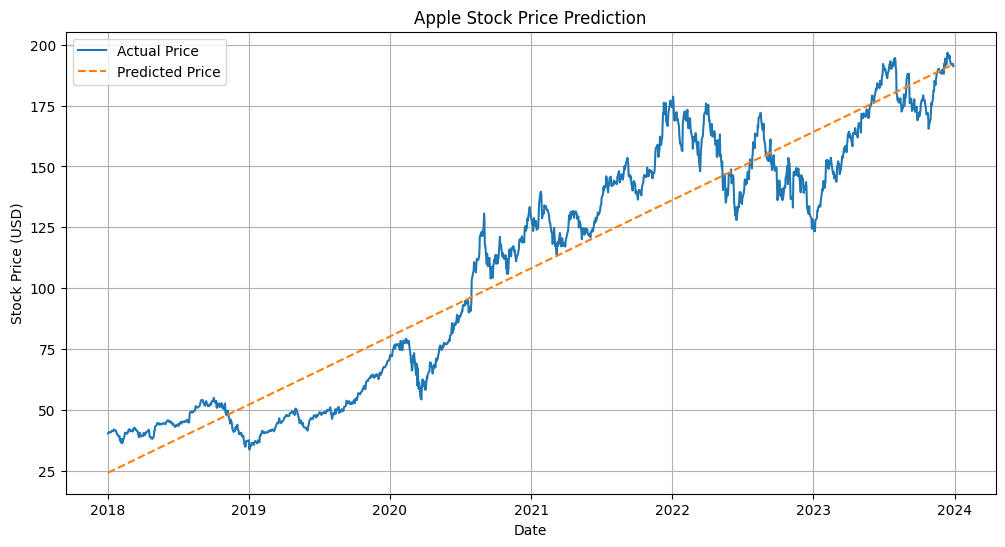

In [7]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Actual Price')
plt.plot(data['Date'], data['Predicted'], label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Apple Stock Price Prediction')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
data.to_csv("AAPL_stock_prediction.csv", index=False)